In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, make_scorer

from matplotlib.colors import ListedColormap
import shap



In [2]:
PATH=r"D:\Jupyter\Hard_Metals\240617-Codes_To_publish\ML_Pipeline\240723\\"

In [3]:
estimator= pd.read_pickle(f"{PATH}random_forest_model_used.pkl")
explainer= pd.read_pickle(f"{PATH}shap_explainer.pkl")

In [4]:
features_trost =  ['slope_0.2',  'norm_slope_0.2',  'curvature','curvature_linear', 'curvature_shift', 'norm_curvature','norm_curvature_linear', 'norm_curvature_shift', 'work_total','work_elastic', 'work_plastic', 'work_ratio', 'h_ratio']
features_others = ['Er(GPa)', 'H(GPa)']
all_features = features_trost.copy()
all_features.extend(features_others)

In [5]:
features=all_features

In [6]:
PATH=r"D:\Dokumente\General_Data\other_people\Hard_Metalls\240422-new_data\worked_data\Paper\Data_Sets\\"
X_val_df = pd.read_csv(f"{PATH}X_test_240722.csv")
y_val = pd.read_csv(f"{PATH}y_test_240722.csv")

In [7]:
y_val["predicted"] = estimator.predict(X_val_df[all_features]) 

In [8]:
f1_score(y_val.Y, y_val.predicted, average="weighted")


0.7897305060877686

In [9]:
f1_score(y_val.Y, y_val.predicted, average="macro")

0.5131526514908336

In [10]:
mapping= {
    'matrix': 0,
    'mc-matrix': 1,
    'm6c-matrix': 2,
    'mc': 3,
    'm6c': 4,
    'mc-mc': 3,
    'm6c-m6c': 4,
    'mc-m6c': 5}

In [11]:
labels= {
    'matrix': 0,
    'mc-matrix': 1,
    'm6c-matrix': 2,
    'mc': 3,}

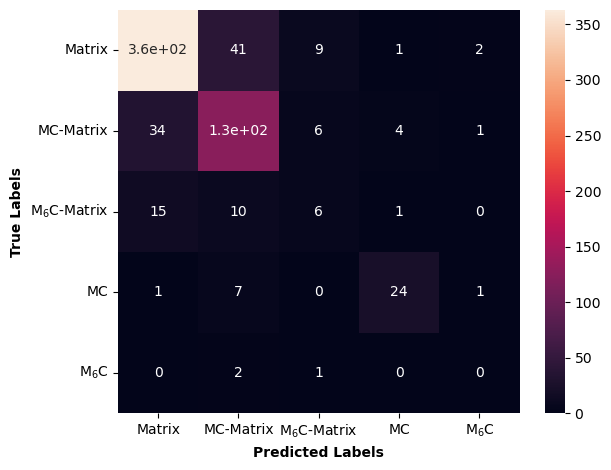

In [12]:
cm = confusion_matrix(y_val.Y, y_val.predicted)
labels= {
    r'Matrix': 0,
    r'MC-Matrix': 1,
    r'$\mathrm{M}_6\mathrm{C}$-Matrix': 2,
    r'MC': 3,
    r"$\mathrm{M}_6\mathrm{C}$": 4,}
sns.heatmap(cm, annot=True,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels', fontweight='bold')
plt.ylabel('True Labels', fontweight='bold')
save_path=r"D:\Dokumente\Paper Writing\Ongoing\Hard_Metalls\images\\"
plt.tight_layout()
#plt.savefig(f"{save_path}testing_confusion_map.jpeg", dpi=600)

In [13]:
shap_values = explainer.shap_values(X_val_df[all_features])


In [14]:
features_formel={'slope_0.2':r'$\frac{dP}{dH}$',
   'work_total': r'$W$',
 'work_elastic':r'$W_e$',
 'work_plastic': r'$W_p$',
 'work_ratio': r'work-ratio',
 'curvature': r'$C_0$',
 'curvature_linear': r'$C_1$',
 'curvature_shift': r'$C_2$',
 'h_ratio':'h-ratio',
 'norm_curvature': r'$C_{0,norm}$',
 'norm_curvature_linear': r'$C_{1,norm}$',
 'norm_curvature_shift': r'$C_{2,norm}$',
 "norm_slope_0.2": r'${\frac{dP}{dH}}_{norm}$',
                 'Er(GPa)': r'$E_{r}$',
                 'H(GPa)': r'$H$'
                 
                }

In [15]:
latex_features=[]
for x in all_features:
    latex_features.append(features_formel[x])

In [16]:
X_val_df=X_val_df.rename(columns=features_formel)

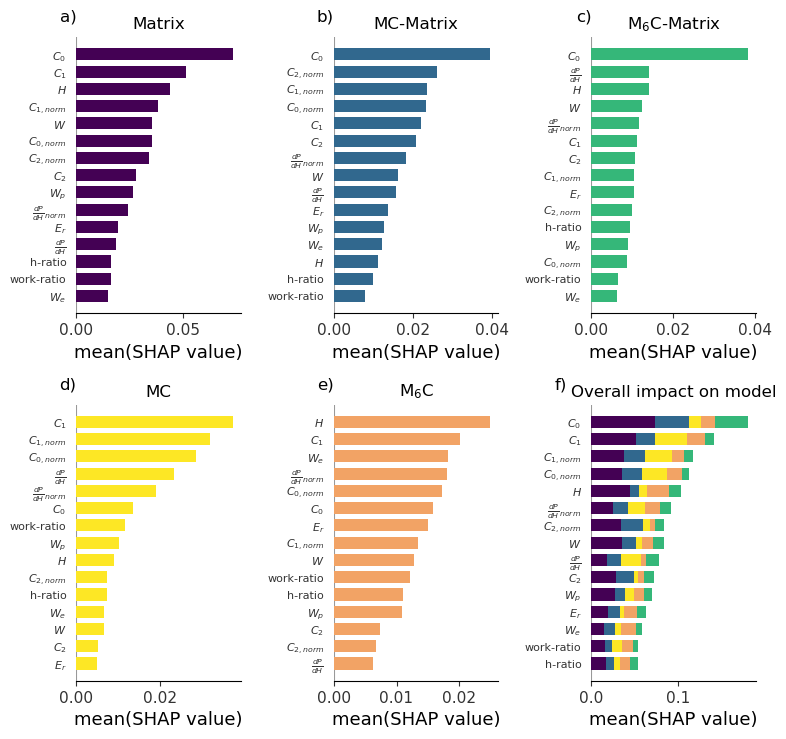

In [17]:

# Assuming 'shap_values', 'X_val_df', and 'latex_features' are already defined
num_classes = len(shap_values)

labels = {
    0: r'Matrix',
    1: r'MC-Matrix',
    2: r"$\mathrm{M}_6\mathrm{C}$-Matrix",
    3: r'MC',
    4: r"$\mathrm{M}_6\mathrm{C}$"
}

colors = {
    "Matrix": "#440154",
    "MC-Matrix": "#31688e",
    "MC": "#fde725",
    r"$\mathrm{M}_6\mathrm{C}$-Matrix": "#35b779",
    r"$\mathrm{M}_6\mathrm{C}$": "#f2a365"
}

color_list = []
class_list = []

# Reduce figure size (adjust as needed)
fig, axes = plt.subplots(2, 3, figsize=(18, 18))

# Loop through each class and plot in the corresponding subplot (handle missing classes)
for i in range(num_classes):
    row = i // 3
    col = i % 3
    
    plt.sca(axes[row, col])  # Set the current axis

    class_name = labels[i]
    shap.summary_plot(shap_values[i], X_val_df[latex_features], show=False, plot_type="bar", color=colors[class_name])
    color_list.append(colors[class_name])
    class_list.append(class_name)

    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].set_title(f"{class_name}",)
    axes[row, col].set_xlabel('mean(SHAP value)')  # Set y-axis label

# Overall impact plot
plt.sca(axes[1, 2])
color_list = ["#440154","#31688e","#fde725","#f2a365", "#35b779"]

shap.summary_plot(shap_values, X_val_df[latex_features], show=False, plot_type="bar", class_names=labels, color=ListedColormap(color_list))  # Pass class names list
axes[1, 2].set_title('Overall impact on model')  # Set title after the call
axes[1, 2].set_xlabel('mean(SHAP value)')  # Set label after the call
axes[1, 2].tick_params(axis='y', labelsize=8)
axes[0, 0].text(0, 1.1, 'a)', transform=axes[0, 0].transAxes, fontsize=12, va='top', ha='right')
axes[0, 1].text(0, 1.1, 'b)', transform=axes[0, 1].transAxes, fontsize=12,  va='top', ha='right')
axes[0, 2].text(0, 1.1, 'c)', transform=axes[0, 2].transAxes, fontsize=12,  va='top', ha='right')
axes[1, 0].text(0, 1.1, 'd)', transform=axes[1, 0].transAxes, fontsize=12, va='top', ha='right')
axes[1, 1].text(0, 1.1, 'e)', transform=axes[1, 1].transAxes, fontsize=12,  va='top', ha='right')
axes[1, 2].text(-0.15, 1.1, 'f)', transform=axes[1, 2].transAxes, fontsize=12,  va='top', ha='right')



legend = axes[1, 2].get_legend()
if legend:
    legend.remove()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.0, 0.99, 1])
save_path=r"D:\Dokumente\Paper Writing\Ongoing\Hard_Metalls\images\\"
plt.savefig(f"{save_path}shap_plot_testing.jpeg", dpi=600)
plt.show()
